# The Bisection Method

In [13]:
# We first import the libraries we will be using in this notebook
import numpy as np                              #numpy
import time                                     #time (to measure the time it takes to execute code)
import math                                     #math functions
from scipy import io, integrate, linalg, signal #scipy has some linear algebra and specialized libraries
import matplotlib.pyplot as plt                 #pyplot
from matplotlib.animation import FuncAnimation  #for animation purposes
from IPython.display import HTML, Video         #to produce video

plt.rcParams['figure.figsize'] = [15, 5]; #changes the size of the display window

We first define an example function f(x); we wish to find a root of f(x) between 3 and 4. 

In [14]:
def fun(x):
    return x + np.cos(x)-3

First, we plot our function in [3,4] using arange (or linspace) and pyplot. We see a clear intersection point a bit smaller than 3.8. 

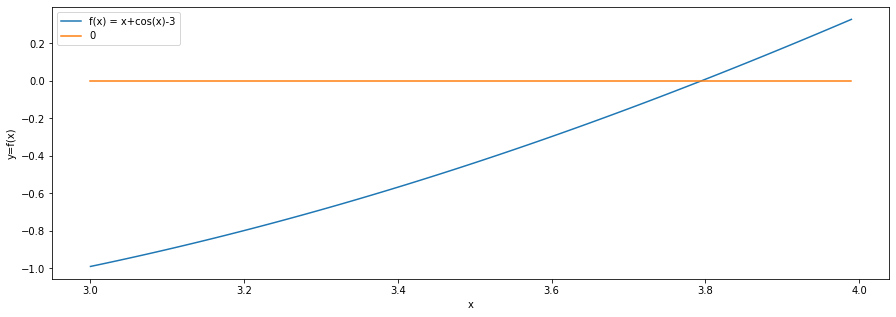

In [15]:
x = np.arange(3,4,0.01)
y = fun(x)
plt.plot(x,y,label="f(x) = x+cos(x)-3"); 
plt.plot(x,0*x,label="0"); 
plt.xlabel('x'); plt.ylabel('y=f(x)');
plt.legend();

## Bisection method implementation

In [19]:
def bisect_method(f,a,b,tol,nmax,vrb):
    #First attempt at bisection method applied to f between a and b
    
    # Initial values for interval [an,bn], midpoint xn 
    an = a; bn=b; n=0;
    xn = (an+bn)/2;
    # Current guess is stored at rn[n]
    rn=np.array([xn]); 
    r=xn;
    ier=0; 
    
    print("\n Bisection method with nmax=%d and tol=%1.1e\n" % (nmax, tol));
    
    # The code cannot work if f(a) and f(b) have the same sign. 
    # In this case, the code displays an error message, outputs empty answers and exits. 
    if f(a)*f(b)>=0:
        print("\n Interval is inadequate, f(a)*f(b)>=0. Try again \n")
        print("f(a)*f(b) = %1.1f \n" % f(a)*f(b)); 
        r = None; 
        return r
    else:
        if vrb:
            print("\n|--n--|--an--|--bn--|----xn----|-|bn-an|--|---|f(xn)|---|");
    
            fig, (ax1, ax2) = plt.subplots(1, 2)
            fig.suptitle('Bisection method results')
            ax1.set(xlabel='x',ylabel='y=f(x)')
            xl=np.linspace(a,b,100,endpoint=True); 
            yl=f(xl);
            ax1.plot(xl,yl);
    
        while n<=nmax:
            #print table row if vrb 
            if vrb:
                print("|--%d--|%1.4f|%1.4f|%1.8f|%1.8f|%1.8f|" % (n,an,bn,xn,bn-an,np.abs(f(xn))));  
            
                #################################################################################
                # Plot results of bisection on subplot 1 of 2 (horizontal). If vrb is true, pause. 
                xint = np.array([an,bn]); 
                yint=f(xint);
                ax1.plot(xint,yint,'ko',xn,f(xn),'rs');            
                #################################################################################    
                
            # If the error estimate is less than tol, get out of while loop
            if (bn-an)<2*tol: #better than np.abs(f(xn))<tol:
                #(break is an instruction that gets out of the while loop)
                ier=1; 
                
                break;  
                
            # If f(an)*f(xn)<0, pick left interval, update bn
            if f(an)*f(xn)<0:
                bn=xn;     
            else:
                #else, pick right interval, update an
                an=xn;  
       
            # update midpoint xn, increase n. 
            n += 1; 
            xn = (an+bn)/2; 
            rn = np.append(rn,xn);

    # Set root estimate to xn. 
    r=xn; 
    
    if vrb:
        ############################################################################
        # subplot 2: approximate error log-log plot
        e = np.abs(r-rn[0:n]); 
        #length of interval
        ln = (b-a)*np.exp2(-np.arange(0,e.size));
        #log-log plot error vs interval length
        ax2.plot(-np.log2(ln),np.log2(e),'r--');
        ax2.set(xlabel='-log2(bn-an)',ylabel='log2(error)');
        ############################################################################
    
    return r, rn;

We now test our bisection code with our example function. We observe the method converges linearly to the root x~3.79438861. Looking at the table, it takes about 3 iterations to gain one digit of accuracy in xn and to decrease |f(xn)|. 


 Bisection method with nmax=100 and tol=5.0e-16


|--n--|--an--|--bn--|----xn----|-|bn-an|--|---|f(xn)|---|
|--0--|3.0000|4.0000|3.50000000|1.00000000|0.43645669|
|--1--|3.5000|4.0000|3.75000000|0.50000000|0.07055936|
|--2--|3.7500|4.0000|3.87500000|0.25000000|0.13210217|
|--3--|3.7500|3.8750|3.81250000|0.12500000|0.02924211|
|--4--|3.7500|3.8125|3.78125000|0.06250000|0.02105034|
|--5--|3.7812|3.8125|3.79687500|0.03125000|0.00399910|
|--6--|3.7812|3.7969|3.78906250|0.01562500|0.00854996|
|--7--|3.7891|3.7969|3.79296875|0.00781250|0.00228150|
|--8--|3.7930|3.7969|3.79492188|0.00390625|0.00085728|
|--9--|3.7930|3.7949|3.79394531|0.00195312|0.00071249|
|--10--|3.7939|3.7949|3.79443359|0.00097656|0.00007230|
|--11--|3.7939|3.7944|3.79418945|0.00048828|0.00032012|
|--12--|3.7942|3.7944|3.79431152|0.00024414|0.00012391|
|--13--|3.7943|3.7944|3.79437256|0.00012207|0.00002581|
|--14--|3.7944|3.7944|3.79440308|0.00006104|0.00002325|
|--15--|3.7944|3.7944|3.79438782|0.00003052|0.00000128|
|--16

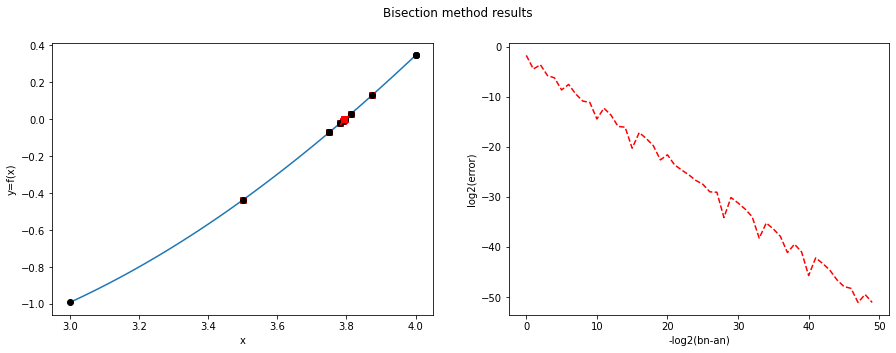

In [20]:
(r,rn)=bisect_method(fun,3,4,5e-16,100,True)


We know from the theory that e_{n+1} should be bounded by (1/2)* e_n. Using a linear fit, we confirm that the experimental rate of convergence is close to 0.5 . 

In [25]:
en = np.abs(r-rn[0:len(rn)-1]);
c1 = np.polyfit(np.arange(0,len(en)),np.log10(en),1); 
print(10**c1[0]);

c2 = np.polyfit(en[10:len(en)-1],en[11:len(en)],1);
print(c2[0])

0.5013725985299908
0.5103844102096554


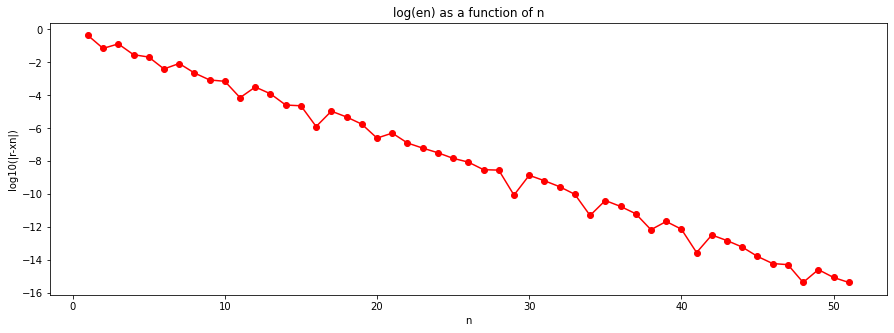

In [37]:
plt.plot(np.arange(1,rn.size+1),np.log10(np.abs(fun(rn))),'r-o');
plt.title("log(en) as a function of n");
plt.xlabel("n"); plt.ylabel("log10(|r-xn|)");

Text(0, 0.5, 'log10(e_{n+1})')

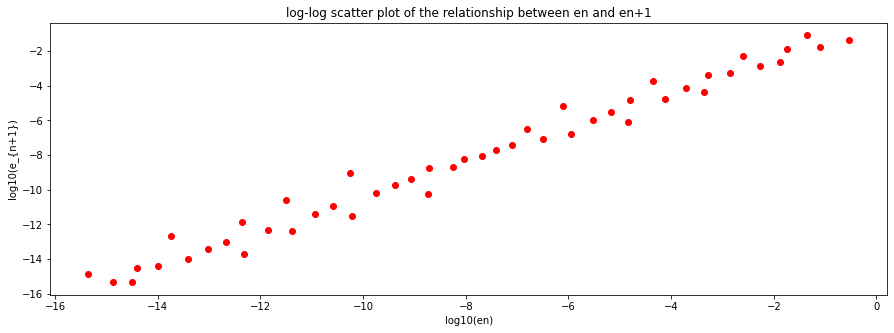

In [35]:
plt.plot(np.log10(en[0:len(en)-1]),np.log10(en[1:len(en)]),'ro');
plt.title("log-log scatter plot of the relationship between en and en+1");
plt.xlabel("log10(en)"); plt.ylabel("log10(e_{n+1})")

### Extra: how to code an animated plot of the bisection method

The main change we have to make here is to set functions for the initial and update rules for each frame, so that FuncAnimation can produce the plots and then an mp4 video based on them. 

In [9]:
def bisect_method_anim(f,a,b,tol,nmax):
    #Bisection method applied to f between a and b, produces animation and saves it as mp4 file
    
    # Initial values for interval [an,bn], midpoint xn 
    an = a; bn=b; n=0;
    xn = (an+bn)/2;
    # Current guess is stored at rn[n]
    rn=np.array([xn]); #midpoint (current guess) array
    ana=np.array([an]); #left endpoint array
    bna=np.array([bn]); #right endpoint array
    r=xn; #root
    
    print("\n Bisection method with nmax=%d and tol=%1.1e\n" % (nmax, tol));
    
    # The code cannot work if f(a) and f(b) have the same sign. 
    # In this case, the code displays an error message, outputs empty answers and exits. 
    if f(a)*f(b)>=0:
        print("\n Interval is inadequate, f(a)*f(b)>=0. Try again \n")
        print("f(a)*f(b) = %1.1f \n" % f(a)*f(b)); 
        r = None; 
        return r
    else:
        print("\n|--n--|--an--|--bn--|----xn----|-|bn-an|--|---|f(xn)|---|");
    
        while n<=nmax:
            #print and pause. Remove or comment out pause if you want the code to go faster. 
            print("|--%d--|%1.4f|%1.4f|%1.8f|%1.8f|%1.8f|" % (n,an,bn,xn,bn-an,np.abs(f(xn))));  
            
            # If the estimate is approximately a root, get out of while loop
            if (bn-an)<2*tol: #np.abs(f(xn))<tol:
                #(break is an instruction that gets out of the while loop)
                break;  
                
            # If f(an)*f(xn)<0, pick left interval, update bn
            if f(an)*f(xn)<0:
                bn=xn;     
            else:
                #else, pick right interval, update an
                an=xn;  
       
            # update midpoint xn, increase n. 
            n += 1; 
            xn = (an+bn)/2; 
            
            # add midpoint, left and right endpoint info
            rn = np.append(rn,xn);
            ana = np.append(ana,an);
            bna = np.append(bna,bn);

    # Set root estimate to xn. 
    r=xn; 
    
    ############################################################################
    # Create animation from data
    fig,ax2 = plt.subplots()
    line2, = ax2.plot([],[],'r--')
    
    # subplot 2: approximate error log-log plot
    e = np.abs(r-rn[0:n]); 
    #length of interval
    ln = (b-a)*np.exp2(-np.arange(0,e.size));
    
    x2data, y2data = [], []
    
    def init():
        ax2.set_xlim(np.min(-np.log2(ln))-1,np.max(-np.log2(ln))+1);
        ax2.set_ylim(np.min(np.log2(e))-1,np.max(np.log2(e))+1);
        ax2.set(xlabel='-log2(bn-an)',ylabel='log2(error)');
        fig.suptitle('Bisection method results animation')
        return line2,

    def update(frame):
        x2data.append(-np.log2(ln[frame])); 
        y2data.append(np.log2(e[frame]));
        line2.set_data(x2data,y2data); 
        return line2,

    ani = FuncAnimation(fig, update, frames=np.arange(e.size),init_func=init,blit=True);
    ani.save('bisection_method_animation.mp4',dpi=160,fps=4, writer="ffmpeg");
    
    #Video("bisection_method_animation.mp4",embed=True,width=1000,height=300) 
    ############################################################################
    
    return r


 Bisection method with nmax=100 and tol=1.0e-15


|--n--|--an--|--bn--|----xn----|-|bn-an|--|---|f(xn)|---|
|--0--|3.0000|4.0000|3.50000000|1.00000000|0.43645669|
|--1--|3.5000|4.0000|3.75000000|0.50000000|0.07055936|
|--2--|3.7500|4.0000|3.87500000|0.25000000|0.13210217|
|--3--|3.7500|3.8750|3.81250000|0.12500000|0.02924211|
|--4--|3.7500|3.8125|3.78125000|0.06250000|0.02105034|
|--5--|3.7812|3.8125|3.79687500|0.03125000|0.00399910|
|--6--|3.7812|3.7969|3.78906250|0.01562500|0.00854996|
|--7--|3.7891|3.7969|3.79296875|0.00781250|0.00228150|
|--8--|3.7930|3.7969|3.79492188|0.00390625|0.00085728|
|--9--|3.7930|3.7949|3.79394531|0.00195312|0.00071249|
|--10--|3.7939|3.7949|3.79443359|0.00097656|0.00007230|
|--11--|3.7939|3.7944|3.79418945|0.00048828|0.00032012|
|--12--|3.7942|3.7944|3.79431152|0.00024414|0.00012391|
|--13--|3.7943|3.7944|3.79437256|0.00012207|0.00002581|
|--14--|3.7944|3.7944|3.79440308|0.00006104|0.00002325|
|--15--|3.7944|3.7944|3.79438782|0.00003052|0.00000128|
|--16

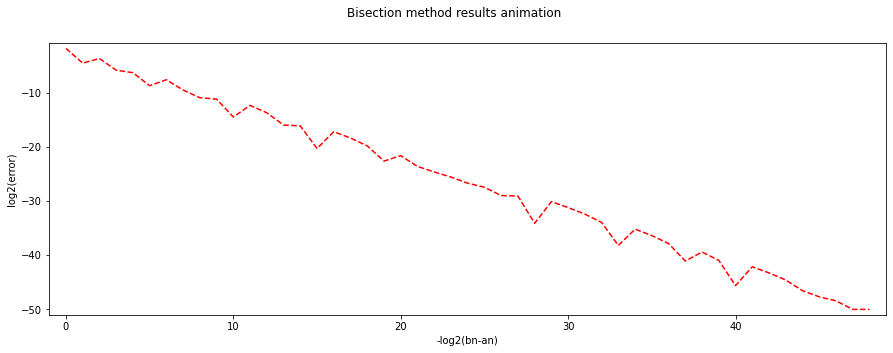

In [10]:
bisect_method_anim(fun,3,4,1e-15,100);

Once the animation is created, we can play it back and display it on Jupyter using Video. 

In [11]:
Video("bisection_method_animation.mp4",embed=True,width=1000,height=300,html_attributes="loop autoplay")